<a href="https://colab.research.google.com/github/abwasker/AnotionToPonder/blob/master/Git_LSTMstockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock Market Predection using stacked LSTM

In [ ]:
import pandas_datareader as pdr

In [ ]:
key="xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

df = pdr.get_data_tiingo('INFY', api_key=key)
df1.to_csv('INFY.csv')
df1.head()

<ipython-input-2-ea0c0fa9ec63>:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df1 = pdr.get_data_tiingo('INFY', api_key=key)


close   high    low   open   volume  \
symbol date                                                             
INFY   2018-08-06 00:00:00+00:00  20.59  20.61  20.32  20.43  3288795   
       2018-08-07 00:00:00+00:00  20.60  20.66  20.30  20.65  4578874   
       2018-08-08 00:00:00+00:00  20.75  20.86  20.53  20.60  3745564   
       2018-08-09 00:00:00+00:00  20.90  20.98  20.82  20.85  2814896   
       2018-08-10 00:00:00+00:00  20.80  20.84  20.67  20.71  2217667   

                                  adjClose   adjHigh    adjLow   adjOpen  \
symbol date                                                                
INFY   2018-08-06 00:00:00+00:00  9.123634  9.132496  9.003994  9.052736   
       2018-08-07 00:00:00+00:00  9.128065  9.154651  8.995132  9.150220   
       2018-08-08 00:00:00+00:00  9.194531  9.243273  9.097047  9.128065   
       2018-08-09 00:00:00+00:00  9.260998  9.296447  9.225549  9.238842   
       2018-08-10 00:00:00+00:00  9.216687  9.234411  9.159083  9.176807   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
INFY   2018-08-06 00:00:00+00:00    6577590      0.0          1.0  
       2018-08-07 00:00:00+00:00    9157748      0.0          1.0  
       2018-08-08 00:00:00+00:00    7491128      0.0          1.0  
       2018-08-09 00:00:00+00:00    5629792      0.0          1.0  
       2018-08-10 00:00:00+00:00    4435334      0.0          1.0

In [ ]:
import pandas as pd


In [ ]:
df1=df.reset_index()['close']

In [ ]:
df1

0       20.59
1       20.60
2       20.75
3       20.90
4       20.80
        ...  
1251    16.63
1252    16.46
1253    16.66
1254    16.80
1255    16.52
Name: close, Length: 1256, dtype: float64

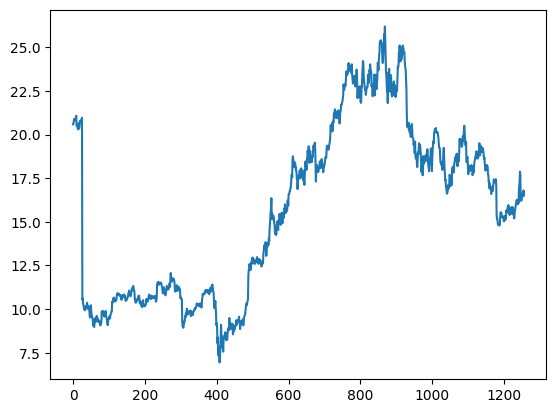

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1.shape

(1256, 1)

In [ ]:
print(df1)

[[0.70872274]
 [0.70924195]
 [0.71703011]
 ...
 [0.5046729 ]
 [0.51194185]
 [0.49740395]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(816, 440)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape)
print(y_train.shape)


(715, 100)
(715,)


In [ ]:
print(X_test.shape)
print(ytest.shape)

(339, 100)
(339,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 362ms/step - loss: 0.0587 - val_loss: 0.0096
Epoch 2/100
12/12 [==============================] - 3s 216ms/step - loss: 0.0101 - val_loss: 0.0129
Epoch 3/100
12/12 [==============================] - 3s 248ms/step - loss: 0.0036 - val_loss: 0.0026
Epoch 4/100
12/12 [==============================] - 3s 256ms/step - loss: 0.0018 - val_loss: 0.0028
Epoch 5/100
12/12 [==============================] - 3s 242ms/step - loss: 0.0016 - val_loss: 0.0032
Epoch 6/100
12/12 [==============================] - 3s 217ms/step - loss: 0.0015 - val_loss: 0.0047
Epoch 7/100
12/12 [==============================] - 3s 215ms/step - loss: 0.0013 - val_loss: 0.0037
Epoch 8/100
12/12 [==============================] - 4s 347ms/step - loss: 0.0013 - val_loss: 0.0036
Epoch 9/100
12/12 [==============================] - 3s 212ms/step - loss: 0.0013 - val_loss: 0.0040
Epoch 10/100
12/12 [==============================] - 3s 234ms/step - loss: 0.0013 - val_l

In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 44ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

14.085946246525657

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

17.868827421997214

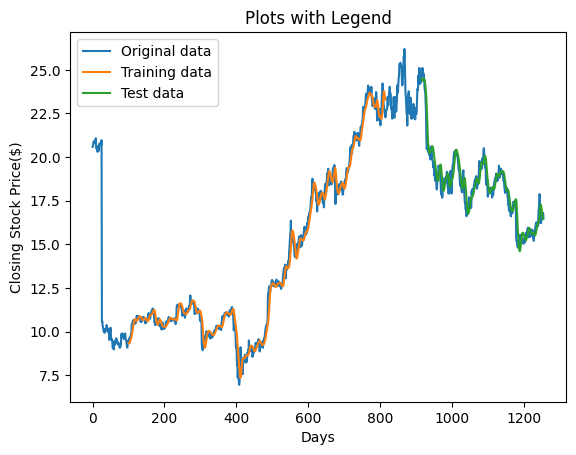

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label='Original data')
plt.plot(trainPredictPlot, label='Training data')
plt.plot(testPredictPlot, label='Test data')

plt.xlabel('Days')
plt.ylabel('Closing Stock Price($)')
plt.title('Plots with Legend')

plt.legend()

plt.show()


In [ ]:
#save plot as an image
#plt.savefig()

In [ ]:
check1 = pd.read_csv('/content/INFY.csv')
check1.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,INFY,2023-07-27 00:00:00+00:00,16.63,16.780,16.615,16.64,11839862,16.63,16.780,16.615,16.64,11839862,0.0,1.0
1252,INFY,2023-07-28 00:00:00+00:00,16.46,16.480,16.190,16.36,9072377,16.46,16.480,16.190,16.36,9072377,0.0,1.0
1253,INFY,2023-07-31 00:00:00+00:00,16.66,16.745,16.600,16.62,6604532,16.66,16.745,16.600,16.62,6604532,0.0,1.0
1254,INFY,2023-08-01 00:00:00+00:00,16.80,16.840,16.650,16.72,7462327,16.80,16.840,16.650,16.72,7462327,0.0,1.0
1255,INFY,2023-08-02 00:00:00+00:00,16.52,16.600,16.435,16.54,11896528,16.52,16.600,16.435,16.54,11896528,0.0,1.0


In [ ]:
len(test_data)


440

In [ ]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
#temp_input

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.49420628]
101
1 day input [0.53634476 0.53946002 0.51869159 0.53219107 0.51661475 0.51869159
 0.51661475 0.50155763 0.5192108  0.51194185 0.52336449 0.51038422
 0.52024922 0.52959502 0.54517134 0.54413292 0.54153686 0.53946002
 0.53530633 0.54257529 0.54569055 0.52596054 0.43925234 0.4278297
 0.42834891 0.41640706 0.40913811 0.41069574 0.41173416 0.40913811
 0.40758048 0.41069574 0.43457944 0.44652129 0.44392523 0.44652129
 0.43821391 0.43406023 0.43146417 0.43198339 0.4325026  0.43406023
 0.42004154 0.42263759 0.43613707 0.42419522 0.42834891 0.42627207
 0.43146417 0.45223261 0.44600208 0.44755971 0.45275182 0.46365524
 0.46521288 0.46832814 0.4615784  0.46002077 0.43925234 0.4517134
 0.4517134  0.44132918 0.44184839 0.46053998 0.46261682 0.44755971
 0.45067497 0.4615784  0.4517134  0.43873313 0.44288681 0.42886812
 0.44444444 0.45067497 0.45742471 0.46521288 0.47403946 0.47767394
 0.48390447 0.47403946 0.47300104 0.4709242  0.48286604 0.47403946
 0.51142264 0.52440291 0.53738318 0

In [ ]:
print()

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
#import matplotlib.pyplot as plt

In [ ]:
len(df1)

1256

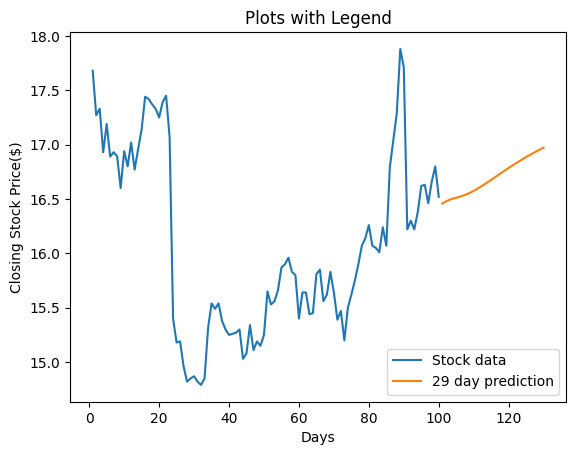

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]),label='Stock data')
plt.plot(day_pred,scaler.inverse_transform(lst_output),label='29 day prediction')
plt.xlabel('Days')
plt.ylabel('Closing Stock Price($)')
plt.title('Plots with Legend')

plt.legend()

plt.show()